# Linear Regresion
In this example we're given a dataset of points $(x, y)$ where x is a feature and y is the target.
Out hypothesis is that the relation between data is of the form $h(x) = ax + b$
Since we're not given $a$ and $b$ we must calculate them. To do so we'll define a loss function and using gradient descent find it's local minimum.

An exampleloss function can be 
$ J(a, b) = \frac{1}{n} \sum (y_i - h(x_i))^2$
And we can try finding it's minimum by the application of gradient descent.
$a_{i+1} = a_i - \Delta t \cdot \frac{\partial J}{\partial a}$  
$b_{i+1} = b_i - \Delta t \cdot \frac{\partial J}{\partial b}$  
This process ends once either the results don't change significantly with new iterations or after a predefined number of epochs.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [8]:
%matplotlib inline

_a = 0.3
_b = 0.5

f = lambda x: _a * x + _b # ground truth
g = lambda x: f(x) + random.gauss(0, 0.02) # a noisy version of f

In [9]:
n = 50 # number of examples

xs = [random.random() for _ in range(n)] # features
ys = list(map(g, xs)) # targets

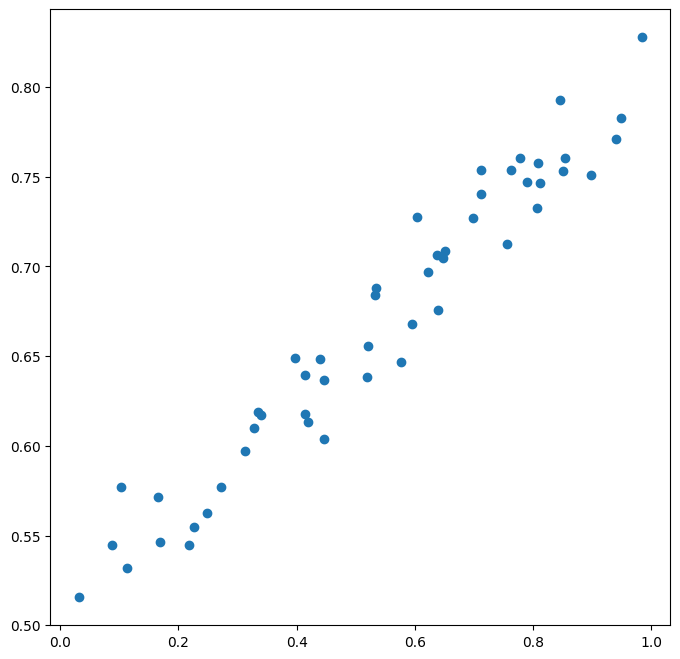

In [15]:
fig = plt.figure(figsize=(8, 8))
plt.scatter(xs, ys)

In [23]:
def predict(a, b, xs):
    return [a * x + b for x in xs]

In [24]:
def loss(a, b, xs, ys):
    assert len(xs) == len(ys)

    result = 0
    for x, y in zip(xs, ys):
        result += (y - (a*x+b))**2
    return result / len(xs)

In [45]:
def partial_a(a, b, xs, ys):
    return (-2 / len(xs)) * sum([x*(-a*x+y-b) for x, y in zip(xs, ys)])

def partial_b(a, b, xs, ys):
    return (-2 / len(xs)) * sum([-a*x+y-b for x, y in zip(xs, ys)])

In [46]:
a = 0.0
b = 0.0
dt = 0.5
iterations = 80
loss_log = [loss(a, b, xs, ys)]

for i in range(iterations):
    new_a = a - dt * partial_a(a, b, xs, ys)
    new_b = b - dt * partial_b(a, b, xs, ys)
    loss_log.append(loss(a, b, xs, ys))
    a, b = new_a, new_b

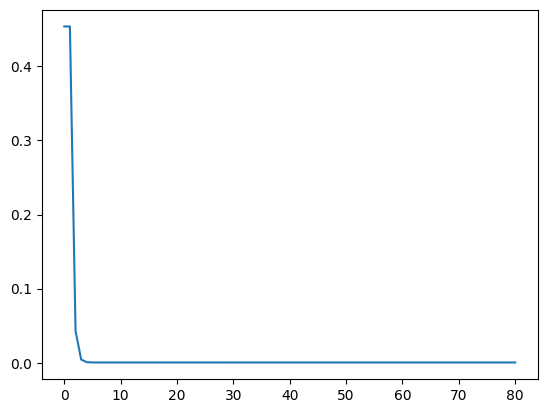

In [47]:
plt.plot(loss_log)

0.3038315028579559 0.5051459362761935


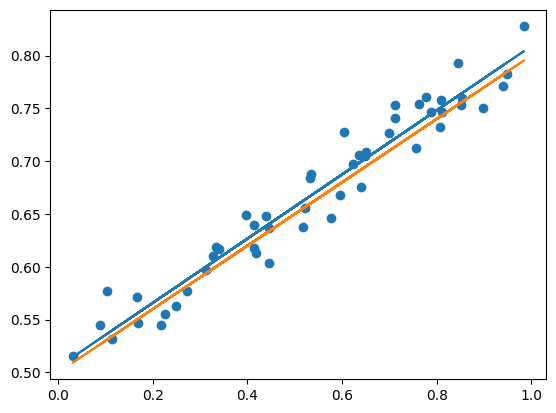

In [48]:
plt.scatter(xs, ys)
plt.plot(xs, predict(a, b, xs))
plt.plot(xs, predict(_a, _b, xs))
print(a, b)